
# Clustering 실습1 - 2D 인공데이터

## 필요한 모듈을 불러오자

In [2]:
%matplotlib inline
''' Junhong Kim
Ph.D. Student in Industrial Management Engineering
Korea University, Seoul, Republic of Korea
Mobile Phone +82 10 3099 3004
E-mail    junhongkim@korea.ac.kr
Data Science and Business Analytics Lab
LinkedIn https://www.linkedin.com/in/charcoalgrey/
Lab Homepage http://dsba.korea.ac.kr'''

import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import collections
import mglearn
import matplotlib.pyplot as plt
RANDOM_STATE = 1026 # For same results based on each algorithm
print ("Mudule load complete!")
import warnings
warnings.filterwarnings("ignore")

Mudule load complete!


## 목적 : 3가지의 인공 데이터를 기반으로 Clustering을 이해해보자.
>### [A] 사용할 알고리듬 
>> 1. k-Means clustering
>> 2. Hierarchical clustering
>> 3. DBSCAN 

>### [B] 사용할 인공 데이터
>> 1. WellSeparated
>> 2. Seperated
>> 3. Twomoon

### 먼저 모든 데이터에 대하여 standardization 한 후의 데이터의 구조를 살펴봄

In [3]:
def standardization(Data):
    Input = ((Data[['X', 'Y']] - np.mean(Data[['X', 'Y']], axis=0)) / np.std(Data[['X', 'Y']], axis=0))
    return(pd.concat([Input, Data['Class']], axis=1))


WellSeparated = standardization(pd.read_csv('Dataset/wellseparated.csv'))
Twomoon = standardization(pd.read_csv('Dataset/Twomoon.csv'))
Seperated = standardization(pd.read_csv('Dataset/Seperated.csv'))

Artificial_Dataset={'WellSeparated':WellSeparated,  'Twomoon': Twomoon,'Seperated':Seperated}

def Data_Info(Data,NAME):
    print(NAME ,": ",np.shape(Data)[0],"/ Class : ",len(collections.Counter(np.array(Data)[:,2])))
    
print("각각의 2차원의 데이터 갯수는 아래와 같음")
for i in range(len(Artificial_Dataset)):
    Data_Info(Artificial_Dataset[list(Artificial_Dataset.keys())[i]],list(Artificial_Dataset.keys())[i])
    

각각의 2차원의 데이터 갯수는 아래와 같음
WellSeparated :  500 / Class :  5
Twomoon :  600 / Class :  2
Seperated :  600 / Class :  3


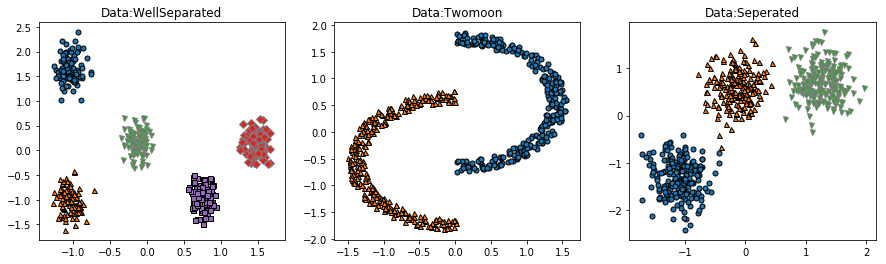

In [5]:
def Simple_Scatter(Data,Name):
    G=sns.pairplot(x_vars=['X'], y_vars=['Y'], data=Data, hue="Class", size=3)
    G.fig.suptitle("Data : "+Name, fontsize=10, color='black', alpha=0.8)

fig, axes = plt.subplots(1,3,figsize=(15,4))
for i in range(len(Artificial_Dataset)):
    Data=Artificial_Dataset[list(Artificial_Dataset.keys())[i]]
    mglearn.discrete_scatter(Data['X'], Data['Y'], Data['Class'], ax=axes[i], s=5)
    axes[i].set_title("Data:" + list(Artificial_Dataset.keys())[i])

# Algorithm1 : k-Means clustering
### 다시 한번 k-Means 클러스터링의 메커니즘을 위해 간단한 도식화를 확인하자

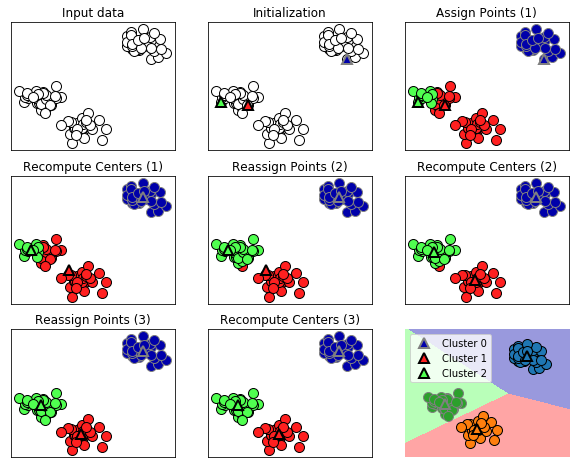

In [6]:
mglearn.plots.plot_kmeans_algorithm()
mglearn.plots.plot_kmeans_boundaries()

### k-Means Visualization을 위해 함수생성

In [8]:
def k_Means_Plot(Data,Select_k,NAME,Init_Method='k-means++',Num_Init=10):
    Data2 = Data[['X', 'Y']]    
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        Kmeans_Clustering = KMeans(n_clusters=i,init=Init_Method,random_state=100,n_init=Num_Init)
        Kmeans_Clustering.fit(Data2)
        mglearn.discrete_scatter(Data2['X'], Data2['Y'], Kmeans_Clustering.labels_, ax=axes[i - 2], s=5)
        mglearn.discrete_scatter(Kmeans_Clustering.cluster_centers_[:, 0], Kmeans_Clustering.cluster_centers_[:, 1],
                                 list(range(i)), markeredgewidth=3, ax=axes[i - 2], s=10)
        Score=np.round(silhouette_score(Data2,Kmeans_Clustering.labels_),3)
        axes[i - 2].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score))

## 해당 실습 목적
> 1. 초기값의 중요성
> 2. silhouette_score가 원형(구형)이 아닌 경우 성능이 좋지 않을 수 있다는것을 파악

### Initialization method = random, Num_init=1
> 횟수도 적고 random initalization을 하여 성능이 좋지 않음을 볼 수 있다.

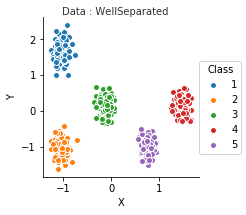

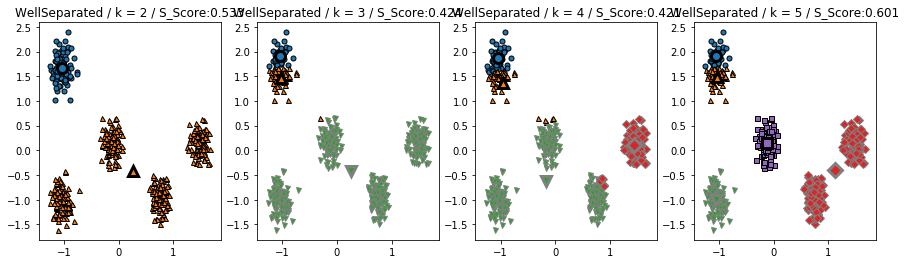

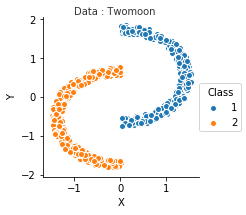

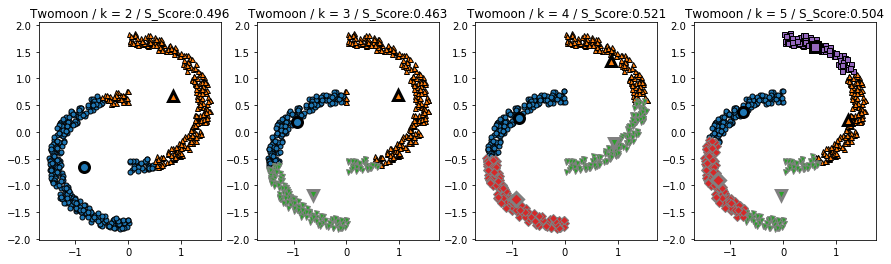

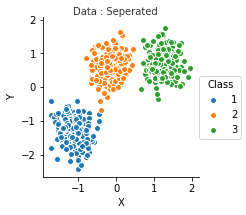

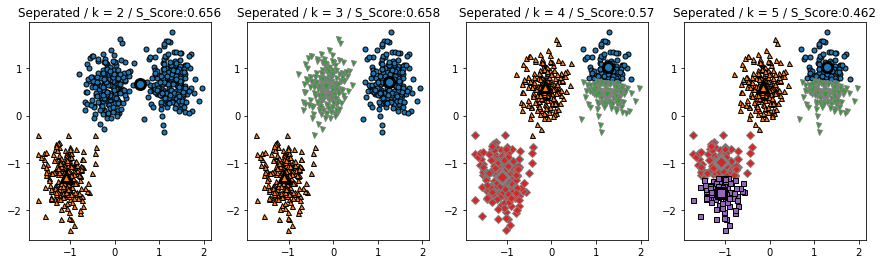

In [9]:
for i in range(0,3):
    Simple_Scatter(Artificial_Dataset[list(Artificial_Dataset.keys())[i]],list(Artificial_Dataset.keys())[i])
    k_Means_Plot(Data=Artificial_Dataset[list(Artificial_Dataset.keys())[i]] ,Select_k=range(2, 6),NAME=list(Artificial_Dataset.keys())[i],
                 Init_Method='random',Num_Init=1)    

### Initialization method = random, Num_init=5
> 횟수를 5로 늘렸지만 random initalization을 하여 성능이 좋지 않음을 볼 수 있다.

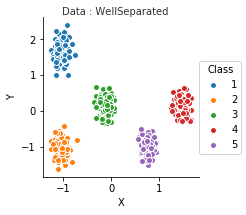

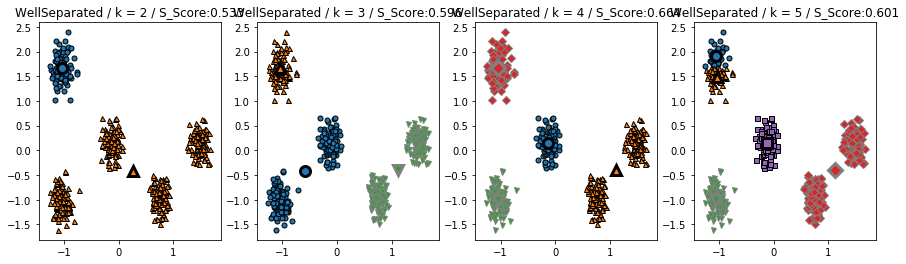

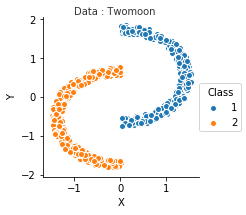

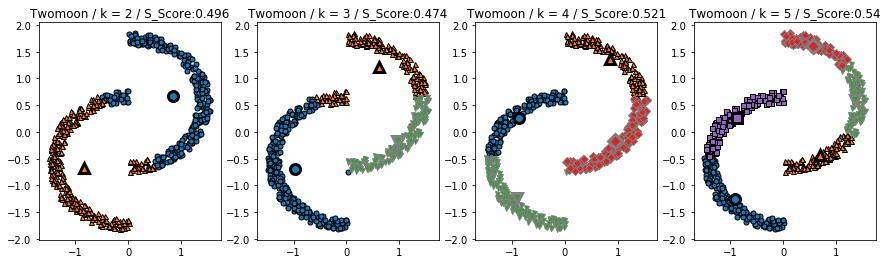

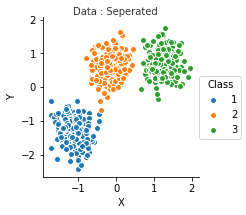

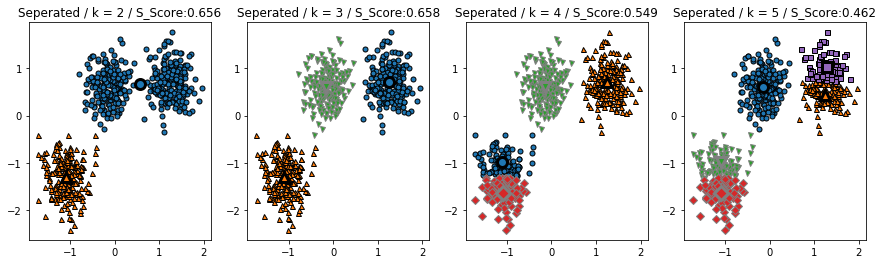

In [11]:
for i in range(0,3):
    Simple_Scatter(Artificial_Dataset[list(Artificial_Dataset.keys())[i]],list(Artificial_Dataset.keys())[i])
    k_Means_Plot(Data=Artificial_Dataset[list(Artificial_Dataset.keys())[i]] ,Select_k=range(2, 6),
                 NAME=list(Artificial_Dataset.keys())[i],Init_Method='random',Num_Init=5)    

### Initialization method = random, Num_init=10
> 횟수를 10로 늘린후의 결과는 random initalization을 하여도 wellseperated datset에서 잘 작동하는 것을 확인

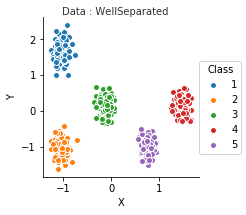

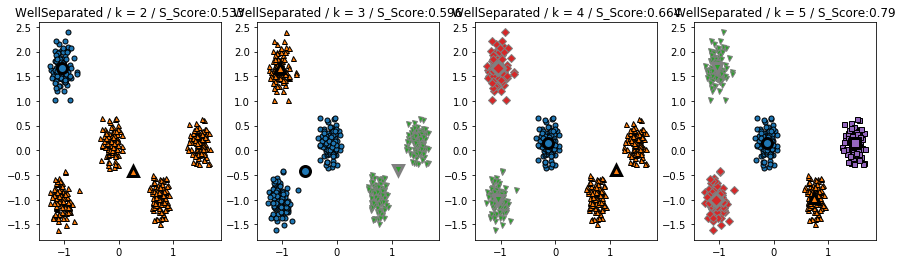

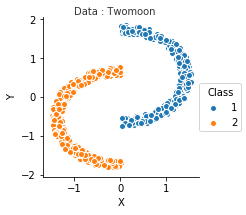

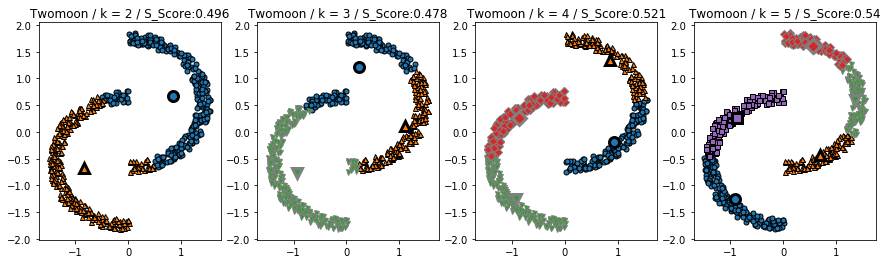

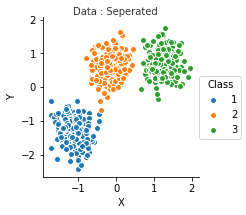

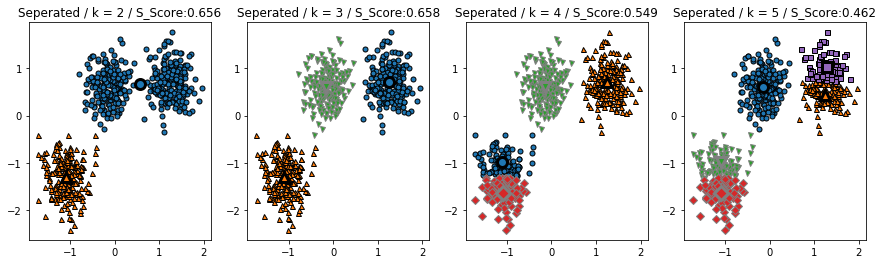

In [12]:
for i in range(0,3):
    Simple_Scatter(Artificial_Dataset[list(Artificial_Dataset.keys())[i]],list(Artificial_Dataset.keys())[i])
    k_Means_Plot(Data=Artificial_Dataset[list(Artificial_Dataset.keys())[i]] ,Select_k=range(2, 6),
                 NAME=list(Artificial_Dataset.keys())[i],Init_Method='random',Num_Init=10)

### Initialization method = k-means++, Num_init=5
>>Arthur, David, and Sergei Vassilvitskii. "k-means++: The advantages of careful seeding." Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms. Society for Industrial and Applied Mathematics, 2007.
http://dl.acm.org/citation.cfm?id=128338
![k-means++](dataset/kmeansplus.png)




### 횟수가 5번 이지만 random 대신에 k-Means++을 초기값으로 사용하는것이 상대적으로 우수함을 알 수 있음

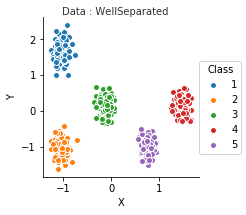

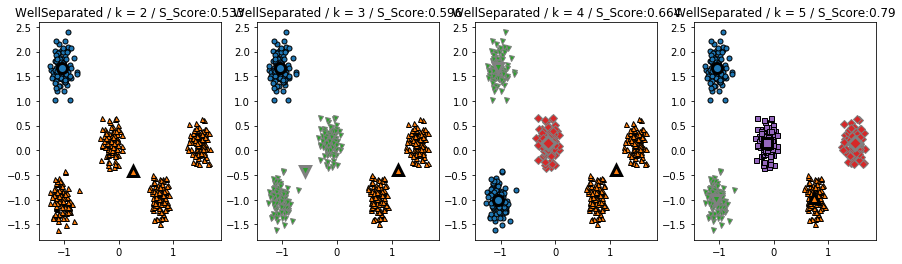

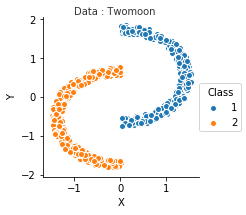

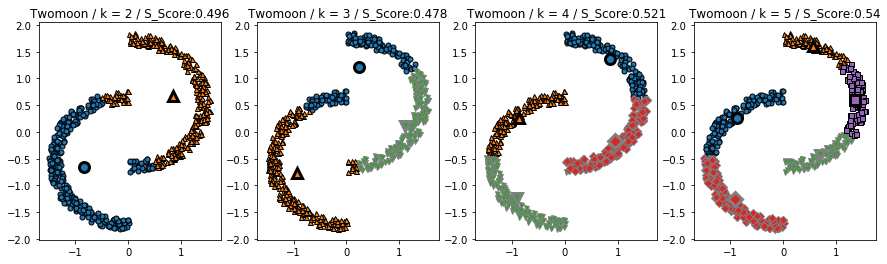

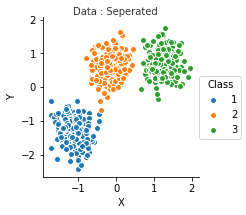

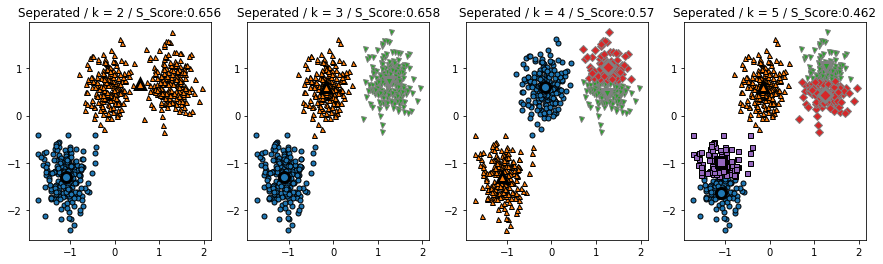

In [13]:
for i in range(0,3):
    Simple_Scatter(Artificial_Dataset[list(Artificial_Dataset.keys())[i]],list(Artificial_Dataset.keys())[i])
    k_Means_Plot(Data=Artificial_Dataset[list(Artificial_Dataset.keys())[i]] ,Select_k=range(2, 6),
                 NAME=list(Artificial_Dataset.keys())[i],Init_Method='k-means++',Num_Init=5)    

# Algorithm2 : Hierarchical clustering
### 다시 한번 Hierarchical clustering(agglomerative)의 메커니즘을 위해 간단한 도식화를 확인함

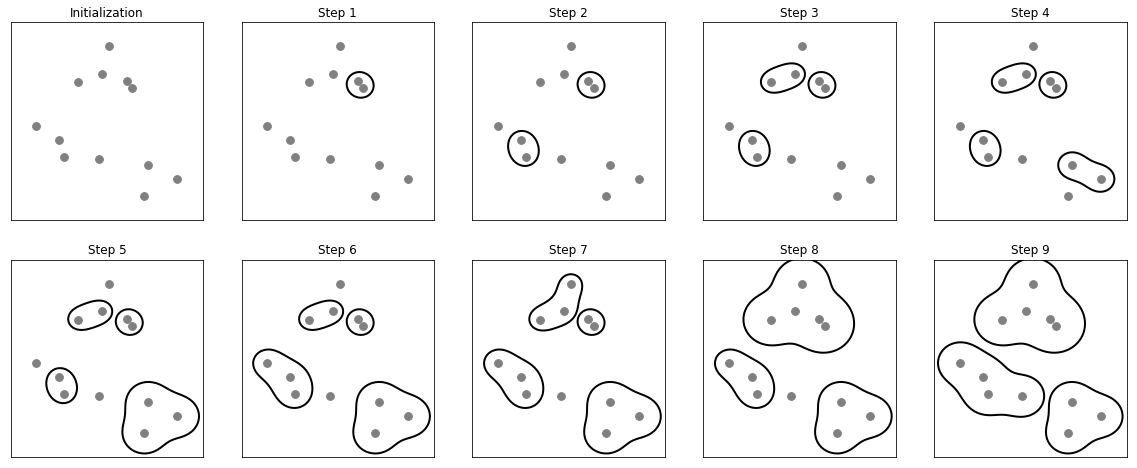

In [14]:
mglearn.plots.plot_agglomerative_algorithm()

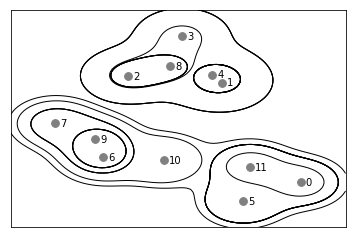

In [15]:
mglearn.plots.plot_agglomerative()

### WellSeparated dataset을 기준으로 complete linkage를 이용하여 dendrogram을 시각화 

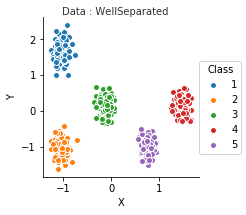

In [16]:
Simple_Scatter(Artificial_Dataset[list(Artificial_Dataset.keys())[0]],list(Artificial_Dataset.keys())[0])
def Fixed_Dendrogram(Data,Num_Viz_Leaf_Cluster,Full_Use):
    Linkage_Matrix = linkage(Data,'complete')
    if(Full_Use==True):
        Num_Viz_Leaf_Cluster=np.shape(Data)[0]
        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('sample index')
    else:
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
    plt.ylabel('distance')
    dendrogram(
        Linkage_Matrix,
        truncate_mode='lastp',  
        p=Num_Viz_Leaf_Cluster, 
        leaf_rotation=90.,
        leaf_font_size=12.,
        color_threshold='default'
    )
    plt.show()

### 전체 datapoint를 모두 dendrogram에 시각화

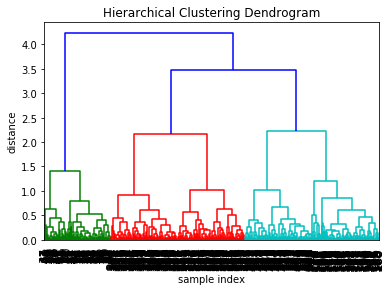

In [17]:
Fixed_Dendrogram(WellSeparated[['X','Y']],0,True)

### 30개와 10개의 cluster를 dendrogram에 시각화

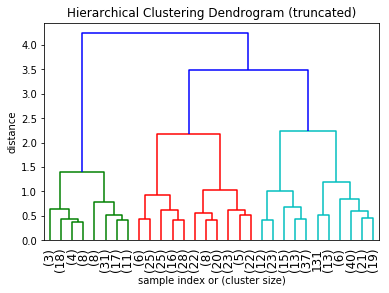

In [14]:
Fixed_Dendrogram(WellSeparated[['X','Y']],30,False)

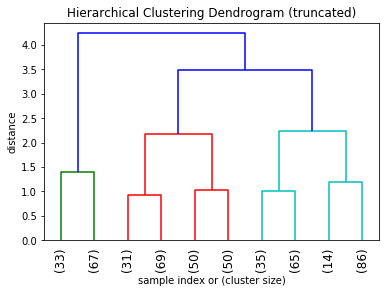

In [15]:
Fixed_Dendrogram(WellSeparated[['X','Y']],10,False)

In [16]:
def Hclust_Plot(Data,Select_k,NAME):
    Data2 = Data[['X', 'Y']]    
    fig, axes = plt.subplots(1, (np.max(list(Select_k))-np.min(list(Select_k)))+1, figsize=(15, 4))
    for i in Select_k:
        H_Clustering = AgglomerativeClustering(n_clusters=i,linkage="complete")
        P_Labels=H_Clustering.fit_predict(Data2)
        mglearn.discrete_scatter(Data2['X'], Data2['Y'], P_Labels, ax=axes[i - 2], s=5)        
        axes[i - 2].set_title("Data:" + NAME + ' / k = ' + str(i))
        Score=np.round(silhouette_score(Data2,P_Labels),3)
        axes[i - 2].set_title( NAME + ' / k = ' + str(i)+' / S_Score:'+str(Score))

### Hierarchical clustering 결과를 보도록 하자 
> 해당 방법론도 Twomoon dataset에서는 잘 작동하지 않음을 볼 수 있음

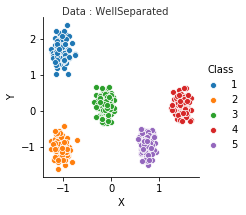

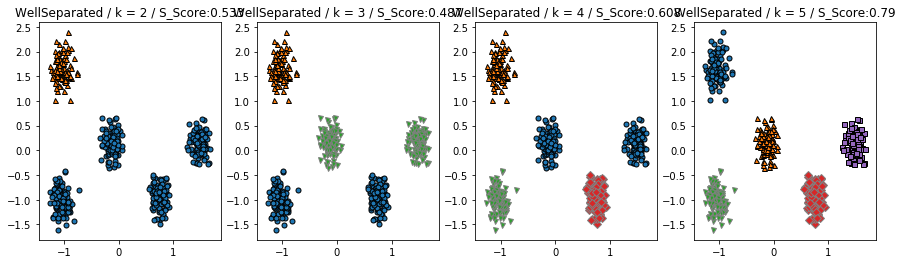

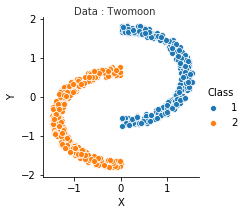

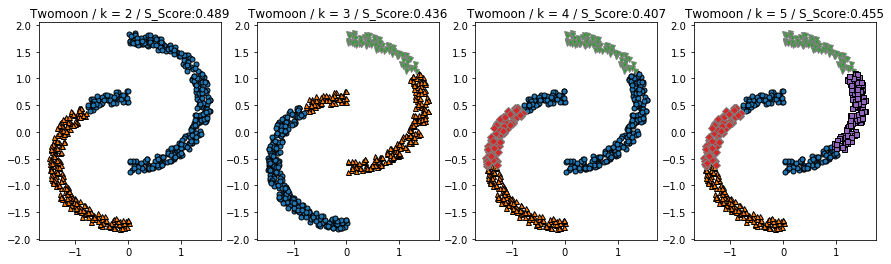

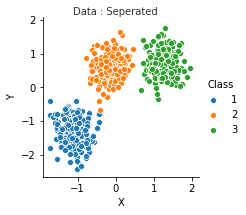

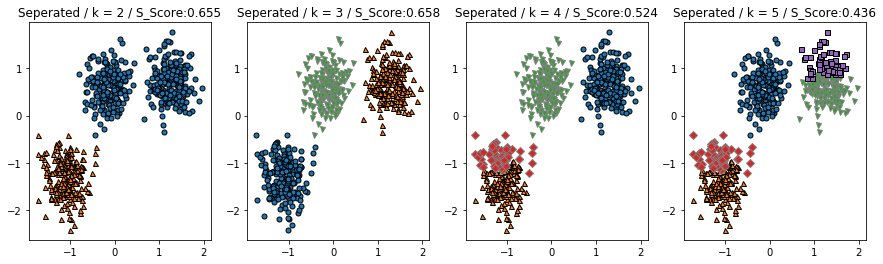

In [17]:
for i in range(0,3):
    Simple_Scatter(Artificial_Dataset[list(Artificial_Dataset.keys())[i]],list(Artificial_Dataset.keys())[i])
    Hclust_Plot(Artificial_Dataset[list(Artificial_Dataset.keys())[i]] ,range(2, 6),list(Artificial_Dataset.keys())[i])

# Algorithm3 : DBSCAN
### 다시 한번 DBSCAN의 메커니즘 확인을 위해 간단한 도식화를 확인하자

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


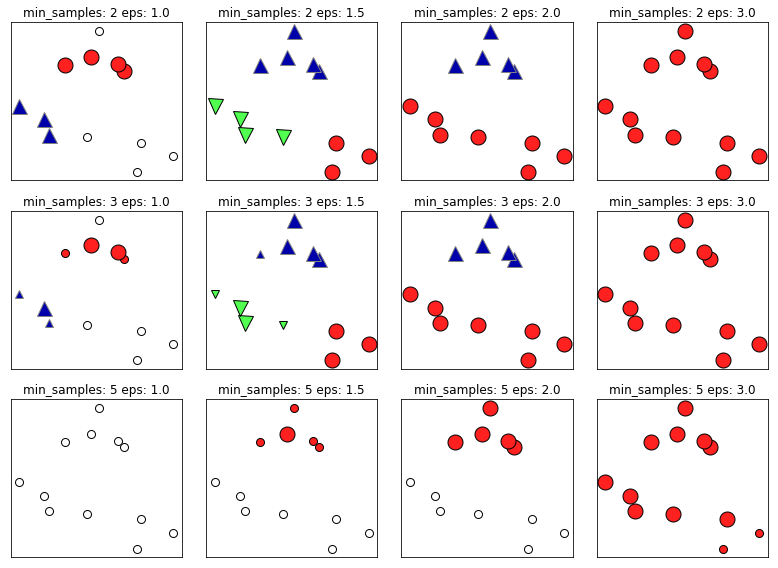

In [18]:
mglearn.plots.plot_dbscan()

In [19]:
def DBSCAN_Plot(Data,NAME,min_samples=5,eps=0.4):
    Data2 = Data[['X', 'Y']]
    Append_k_Means_Results = list()
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    Set_DBSCAN_Hyperparameter=DBSCAN(min_samples=min_samples,eps=eps)
    Results = Set_DBSCAN_Hyperparameter.fit_predict(Data2)
    Score=np.round(silhouette_score(Data2,Results),3)
    mglearn.discrete_scatter(Data2['X'], Data2['Y'], Data['Class'], ax=axes[0], s=5)
    axes[0].set_title("Data:" + NAME + 'GroundTruth')    
    mglearn.discrete_scatter(Data2['X'], Data2['Y'], Results, ax=axes[1], s=5)
    axes[1].set_title("Data:" + NAME + ' DBSCAN/ eps:'+str(eps)+' / min_sample:'+str(min_samples)+'/ S_score:'+str(Score))

### DBSCAN 결과를 보도록 하자 
> 1. WellSeparated 아주 잘 잘동함
> 2. Seperated에서는 eps가 커서 전체적인 하나의 결과로 나온것을 확인
> 3. Twomoon에서는 아주 잘 작동하는것을 확인할 수 있으며 silhouette score가 구형의 데이터가 아니기 때문에 다소 낮게 산출 됨을 확인

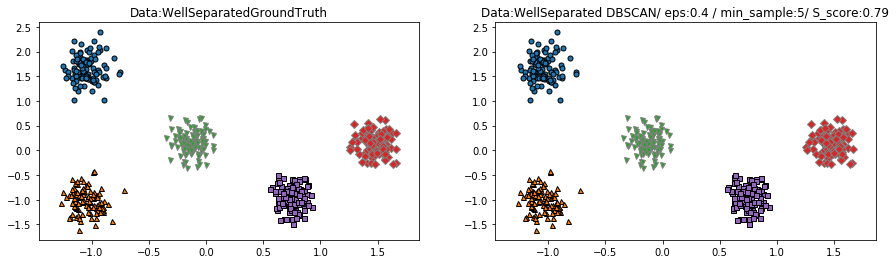

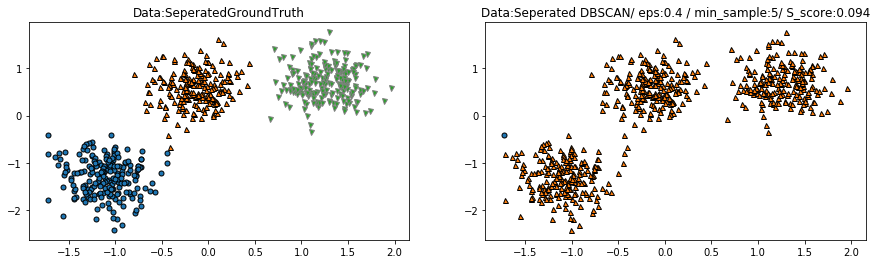

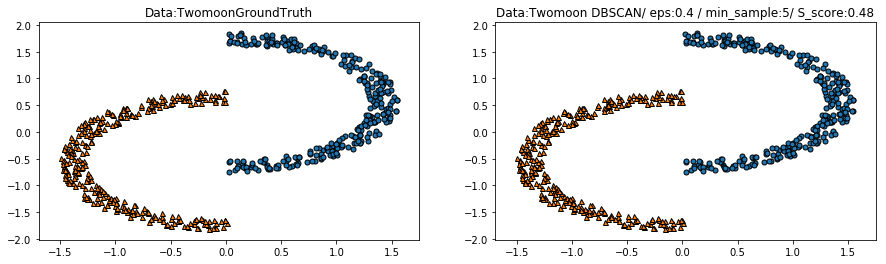

In [20]:
DBSCAN_Plot(Data=WellSeparated,NAME="WellSeparated")
DBSCAN_Plot(Data=Seperated,NAME="Seperated")
DBSCAN_Plot(Data=Twomoon,NAME="Twomoon")

### 다양한 min_sample과 eps를 통하여 DBSCAN결과 확인
> 1. Seperated의 경우 eps가 0.35이상이면 ground truth의 cluster2개가 뭉쳐짐을 확인 (silhouette score 낮아짐)
> 2. Best hyper-parameter는 {eps = 0.3, min_smaple = 7}, {eps = 0.3, min_smaple = 5}

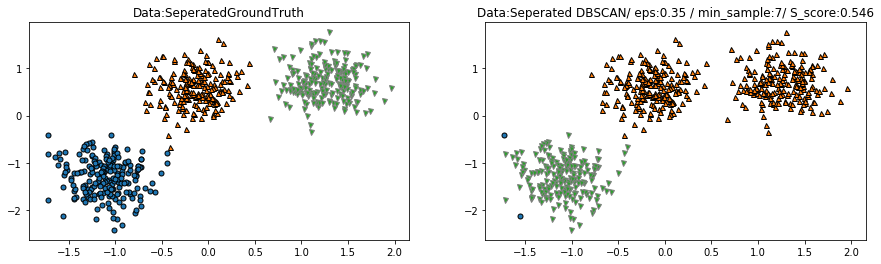

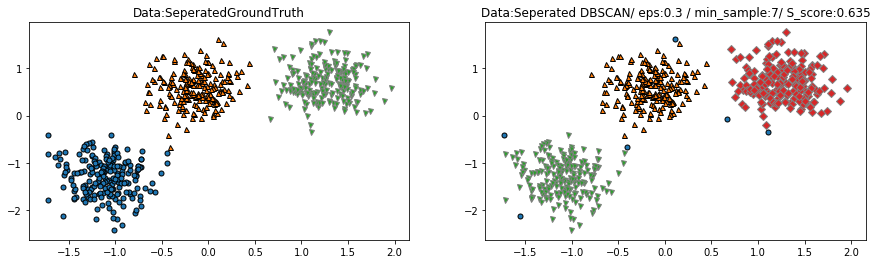

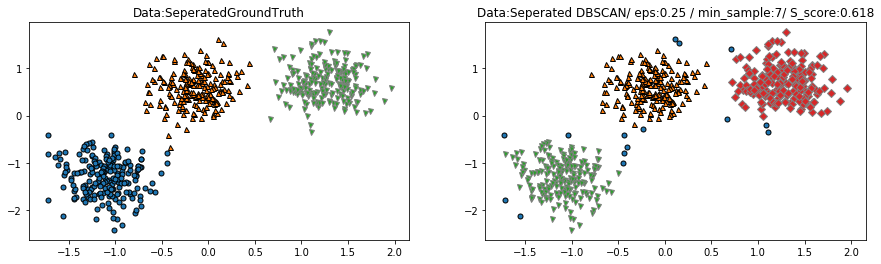

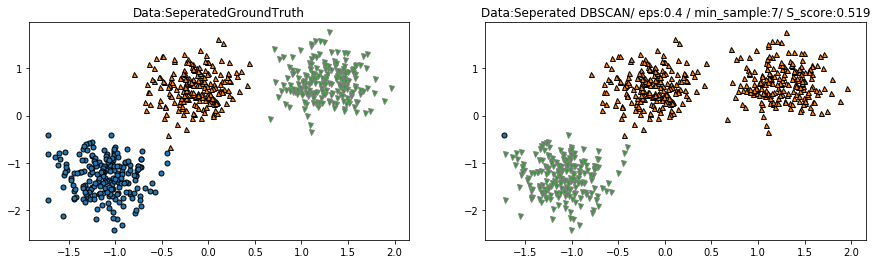

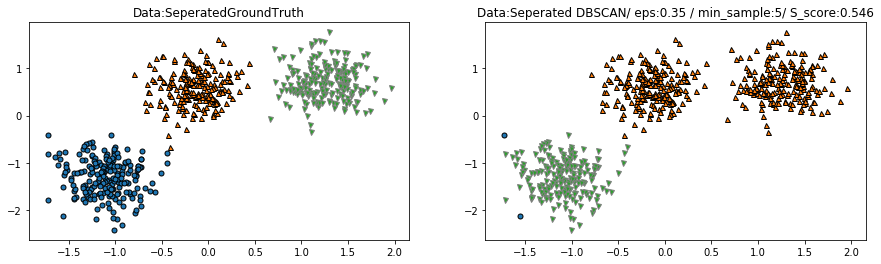

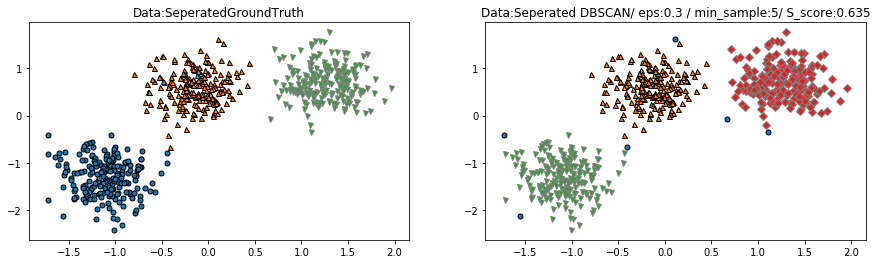

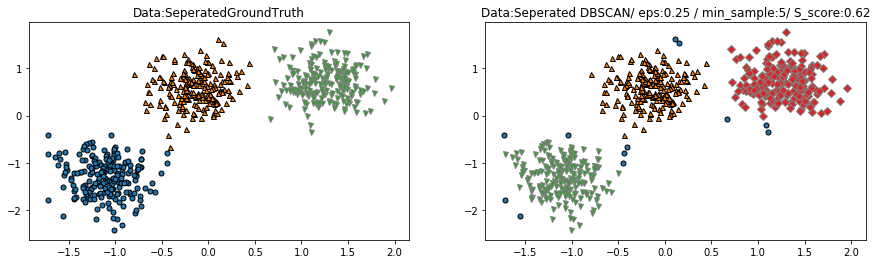

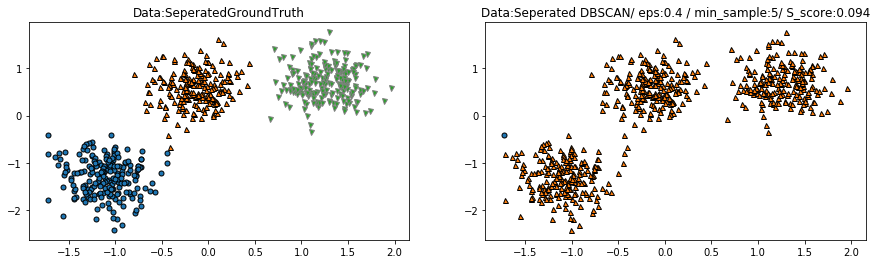

In [21]:
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=7,eps=0.35)
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=7,eps=0.30)
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=7,eps=0.25)
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=7,eps=0.40)
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=5,eps=0.35)
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=5,eps=0.30)
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=5,eps=0.25)
DBSCAN_Plot(Data=Seperated,NAME="Seperated",min_samples=5,eps=0.40)

# Clustering 실습2 - Personal Loan
> #### 실습목표 : Personal Loan 데이터를 기반으로 silhouette score기반 최적의 k-Means clustering 생성 후 해석 

### 사용한 PersonalLoan 데이터셋은 다음과 같이 구성되어 있으며 ID와 ZIP code와 Personal Loan은 제외함
!['Ploan_Description'](dataset/Ploan_Description.png)

### 사용할 데이터를 추출 후,  standardization함

In [18]:
# 사용할 Personal Loan 데이터셋을 불러옵니다.
Rawdata = pd.read_csv('dataset/Personal Loan.csv')
# Print Column names

print("'Personal Loan' data column name : ", list(Rawdata.columns.values))
print("ID와 ZIP Code는 사용하지 않습니다")
# Allocate column index based on Input and Output varaibles

Input_Column_Index = np.concatenate((range(1,4),range(5,9),range(10,14)))
Target_Column_Index = np.array([9])

# Distance를 이용한 similarity를 구할것이므로 모든 변수를 standardization 한다.
Input_Rawdata = np.array(Rawdata)[:,Input_Column_Index]
Personal_Loan_Data = np.array(Rawdata)[:,Target_Column_Index]

def standardization(Data):
 return ((Data - np.mean(Data, axis=0)) / np.std(Data, axis=0))

Input_Std = standardization(Input_Rawdata)

'Personal Loan' data column name :  ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
ID와 ZIP Code는 사용하지 않습니다


### k-Means clustering을 시행
> 1. Hyper-parameter인 k는 2~10까지 생성
> 2. 평가지표는 silhouette score를 사용

In [19]:
def k_Means_Ploan(Data,Select_k,Init_Method='k-means++',Num_Init=100):
    Result_List = list()
    Parameter_List = list()
    Silhouette_List=list()
    for i in Select_k:
        Kmeans_Clustering = KMeans(n_clusters=i,init=Init_Method,n_init=Num_Init,random_state=RANDOM_STATE)
        Kmeans_Clustering.fit(Data)
        Result_List.append(Kmeans_Clustering.labels_)
        Silhouette_List.append(np.round(silhouette_score(Data,Kmeans_Clustering.labels_),3))
        Parameter_List.append(str(i))      
    print("Complete!")
    return(Result_List, Parameter_List,Silhouette_List)

In [24]:
Cluster_Results, Parameter_K, Shilhouette_Score=k_Means_Ploan(Input_Std,range(2,11))

Complete!


### k=5일때가 Best인것을 확인

Best k is : 5
Counter({2: 918, 1: 890, 3: 341, 0: 195, 4: 156})


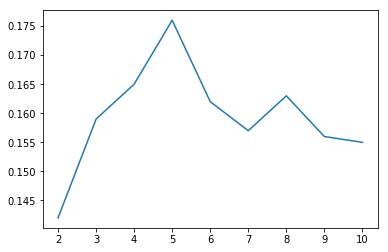

In [25]:
Best_K_based_on_Shilhouette= Parameter_K[np.where(Shilhouette_Score==np.max(Shilhouette_Score))[0][0]]
Best_Cluster_Results = Cluster_Results[np.where(Shilhouette_Score==np.max(Shilhouette_Score))[0][0]]
print("Best k is : " + Best_K_based_on_Shilhouette)
print(collections.Counter(Best_Cluster_Results))
plt.plot(Parameter_K,Shilhouette_Score)

### k=5일때의 각 클러스터 변수의 평균값을 Table로 시각화

In [26]:
FULL_Append=list()
for i in range(int(Best_K_based_on_Shilhouette)):

    if (i == 1):
        MinMax_Append = list()

    A = Input_Rawdata[np.where(Best_Cluster_Results == i)]
    B = Personal_Loan_Data[np.where(Best_Cluster_Results == i)]
    P_Loan_Ratio=round(np.sum(B)/np.shape(B)[0],3)

    AVG_List=list()

    for j in range(np.shape(A)[1]):
        if (j == 1):
            AVG_List.append(np.mean(A[:, j]+1e-8))
            if (i == 1):
                MinMax_Append.append((min(Input_Rawdata[:, j]+2+1e-10), max(Input_Rawdata[:, j]+2.1)))
        elif (j==5):
            Undergrad_Ratio =list(collections.Counter(A[:, 5]).values())[0] / np.shape(A)[0]
            Graduate_Ratio = list(collections.Counter(A[:, 5]).values())[1] / np.shape(A)[0]
            Adv_Prof_Ratio = list(collections.Counter(A[:, 5]).values())[2] / np.shape(A)[0]
            AVG_List.append(Undergrad_Ratio)
            AVG_List.append(Graduate_Ratio)
            AVG_List.append(Adv_Prof_Ratio)
            if(i==1):
                for z in range(3):
                    MinMax_Append.append((0+1e-10, 1+0.1))
        else:
            AVG_List.append(np.mean(A[:,j]+11e-8))
            if (i == 1):
                MinMax_Append.append((min(Input_Rawdata[:, j]+1e-10),max(Input_Rawdata[:, j])+0.1))

    AVG_List.append(P_Loan_Ratio)
    FULL_Append.append(AVG_List)


Col_Name=np.concatenate((list(Rawdata.columns.values)[1:4],
list(Rawdata.columns.values)[5:7],
['Undergrad_Ratio','Graduate_Ratio','Adv_Prof_Ratio','Morgage'],
list(Rawdata.columns.values)[10:14],['P_Loan']))

MinMax_Append.append((0+1e-10,1))
FULL_Append = pd.DataFrame(FULL_Append)
FULL_Append.columns=Col_Name

In [27]:
FULL_Append.round(2)

,Age,Experience,Income,Family,CCAvg,Undergrad_Ratio,Graduate_Ratio,Adv_Prof_Ratio,Morgage,Securities Account,CD Account,Online,CreditCard,P_Loan
0,46.18,20.86,62.73,2.55,1.62,0.37,0.29,0.34,52.48,1.00,0.0,0.51,0.12,0.02
1,35.06,9.84,60.65,2.59,1.37,0.37,0.32,0.31,48.67,0.00,0.0,0.58,0.25,0.04
2,55.62,30.31,57.57,2.40,1.33,0.29,0.33,0.38,43.42,0.00,0.0,0.61,0.31,0.04
3,43.31,18.30,147.43,1.86,4.91,0.14,0.73,0.13,104.15,0.01,0.0,0.49,0.23,0.31
4,46.95,21.87,107.62,2.46,2.89,0.30,0.30,0.40,93.24,0.48,1.0,0.95,0.74,0.50


### Rader Chart를 위한 함수 생성

In [28]:
def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1)
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i))
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles,
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2))
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

## Rader chart를 통한 Cluster 해석

In [29]:
FULL_Append = FULL_Append.sort_values(['P_Loan'],ascending=False)
FULL_Append.round(2)

,Age,Experience,Income,Family,CCAvg,Undergrad_Ratio,Graduate_Ratio,Adv_Prof_Ratio,Morgage,Securities Account,CD Account,Online,CreditCard,P_Loan
4,46.95,21.87,107.62,2.46,2.89,0.30,0.30,0.40,93.24,0.48,1.0,0.95,0.74,0.50
3,43.31,18.30,147.43,1.86,4.91,0.14,0.73,0.13,104.15,0.01,0.0,0.49,0.23,0.31
1,35.06,9.84,60.65,2.59,1.37,0.37,0.32,0.31,48.67,0.00,0.0,0.58,0.25,0.04
2,55.62,30.31,57.57,2.40,1.33,0.29,0.33,0.38,43.42,0.00,0.0,0.61,0.31,0.04
0,46.18,20.86,62.73,2.55,1.62,0.37,0.29,0.34,52.48,1.00,0.0,0.51,0.12,0.02


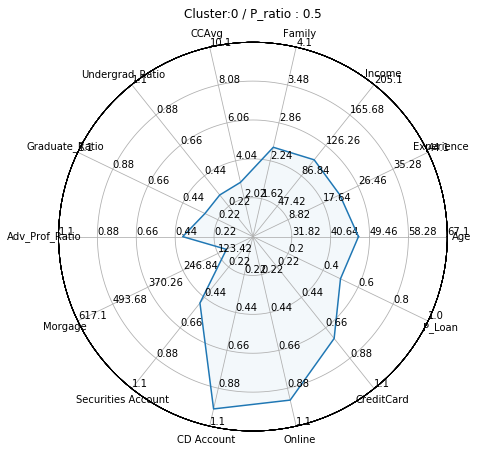

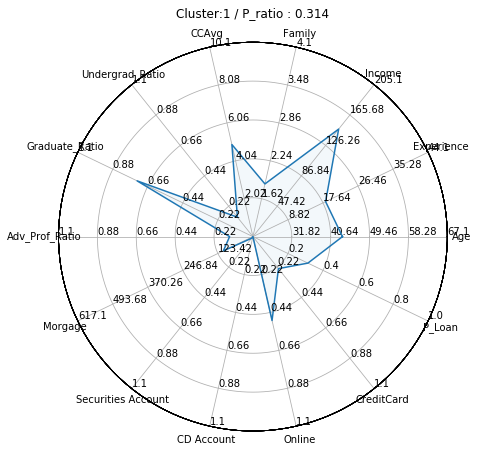

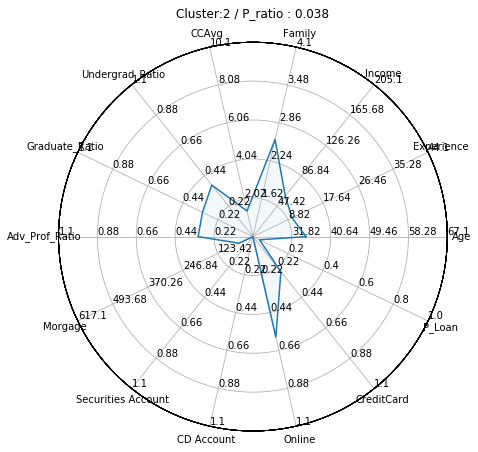

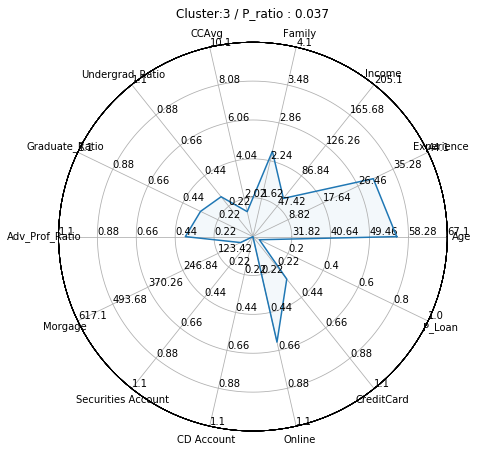

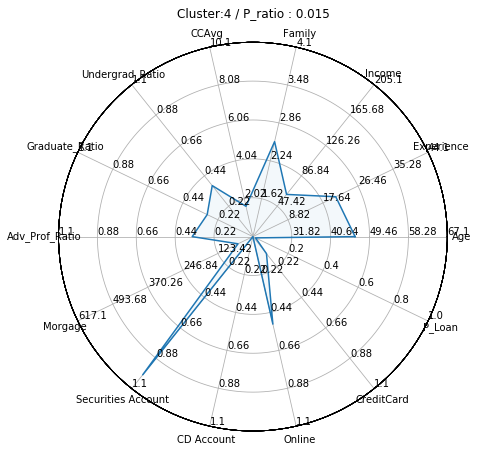

In [30]:
for i in range(5):
    variables = FULL_Append.columns.values
    data = np.array(FULL_Append)[i,:]
    ranges = MinMax_Append
    # plotting
    fig1 = plt.figure(figsize=(6,6))
    radar = ComplexRadar(fig1, variables, ranges)
    radar.plot(data)
    radar.fill(data, alpha=0.05)
    plt.title("Cluster:"+str(i)+" / P_ratio : "+ str(data[13]))
    plt.show()